In [1]:
import cv2
import numpy as np
from data_parse import DataParser
from shirt_color import ShirtColor
import random
from tqdm import tqdm

In [2]:
directory = 'data/SoccerNetGS/gamestate-2024/train/'
data_parser = DataParser(directory)
df = data_parser.parse_data_to_df()

Wczytywanie danych...


100%|██████████| 58/58 [00:12<00:00,  4.56it/s]


Tworzenie DataFrame...


100%|██████████| 57/57 [00:04<00:00, 13.36it/s]


In [3]:
indexes = random.sample(list(df['image_id'].unique()), 500)

In [4]:
prediction_results = {}
for img_id in tqdm(indexes):
    img_path = f'data/SoccerNetGS/gamestate-2024/train/SNGS-{img_id[1:4]}/img1/{img_id[-6:]}.jpg'
    frame = cv2.imread(img_path)
    shirts_data_test = data_parser.get_shirts_data(img_id)
    b_boxes = [row for row in shirts_data_test[['bbox_image_x', 'bbox_image_y', 'bbox_image_w', 'bbox_image_h']].values]
    true_values = [1 if row == 'left' else 0 for row in shirts_data_test['attributes_team'].values]
    shirt_color = ShirtColor(frame, b_boxes, true_values)
    accuracy = shirt_color.run_prediction()
    prediction_results[img_id] = accuracy

100%|██████████| 500/500 [00:38<00:00, 13.12it/s]


In [5]:
prediction_results_mapped = {k: 1 - v if v < 0.5 else v for k, v in prediction_results.items()}

In [ ]:
prediction_results_mapped

In [6]:
avg_prediction = sum(prediction_results_mapped.values()) / len(prediction_results_mapped)
avg_prediction

np.float64(0.8322898383436317)

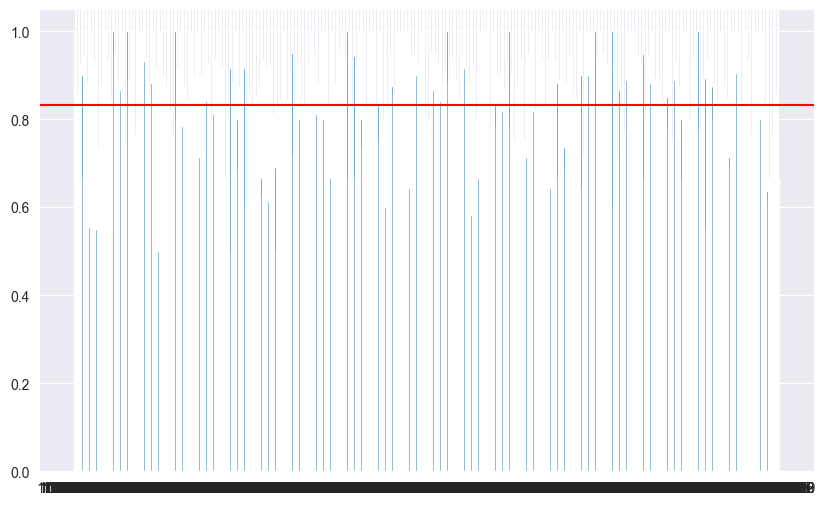

In [7]:
#plotting
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(prediction_results_mapped.keys(), prediction_results_mapped.values())
plt.axhline(y=avg_prediction, color='r', linestyle='-')
plt.show()
